<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [3]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [4]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [5]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [6]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [7]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [8]:
EleData.describe()

,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,4.277750e+05,4.277750e+05,427775.000000,427775.000000,427775.000000,427775.000000
mean,2.845230e+15,1.321295e+16,1.021941,5.469492,8297.878123,2.578220
std,1.268358e+15,5.458201e+16,0.222356,2.658440,13781.504587,1.960068
min,1.528676e+08,2.072001e+08,1.000000,0.000000,0.000000,-1.000000
25%,1.600075e+15,1.603993e+15,1.000000,4.000000,900.000000,1.000000
50%,2.611817e+15,2.618906e+15,1.000000,5.000000,2000.000000,2.000000
75%,3.610341e+15,4.397844e+15,1.000000,7.000000,6900.000000,3.000000
max,4.641665e+15,3.000373e+17,19.000000,60.000000,280000.000000,15.000000


In [9]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [10]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [11]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [12]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [13]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [14]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [15]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp

EleData=EleData[(EleData.gmv!='')]

In [16]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  object        
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [17]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [18]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [19]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [20]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [21]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<20000)[EleData.product_analytic_vertical.value_counts()<20000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [22]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [23]:
## product MRP
EleData.product_mrp.astype(float)


1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 395657, dtype: float64

Outlier treatment and Feature Engineering

In [24]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   fsn_id                             395657 non-null  object        
 1   order_date                         395657 non-null  datetime64[ns]
 2   Year                               395657 non-null  object        
 3   Month                              395657 non-null  object        
 4   order_id                           395657 non-null  float64       
 5   order_item_id                      395657 non-null  float64       
 6   gmv                                395657 non-null  object        
 7   units                              395657 non-null  int64         
 8   order_payment_type                 395657 non-null  object        
 9   sla                                395657 non-null  int64         
 10  cust_id         

In [25]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [26]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


In [27]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')


In [28]:
# EleData2[num].describe()
num

['units', 'sla', 'product_mrp', 'product_procurement_sla']

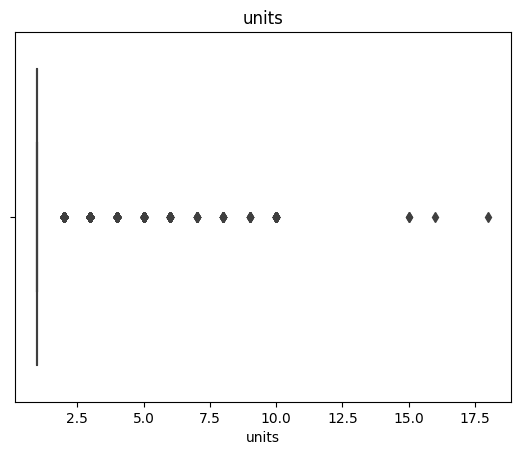

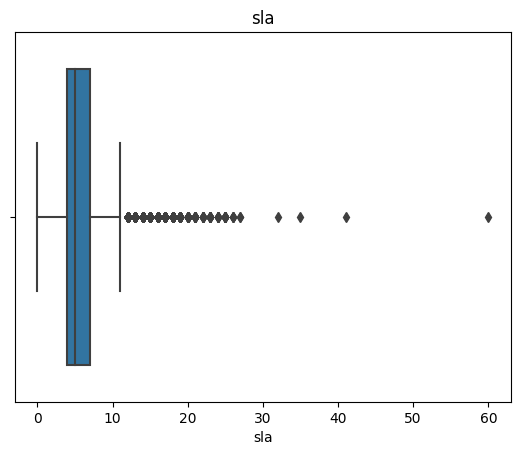

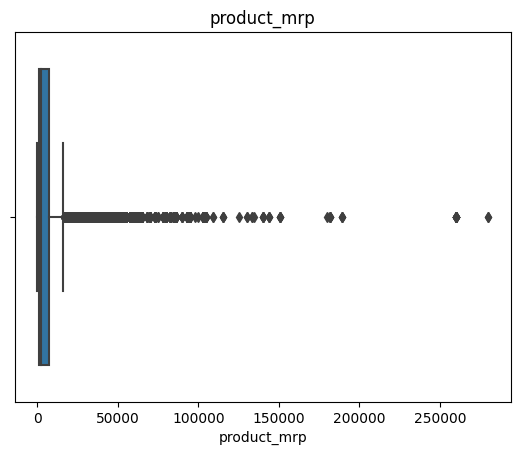

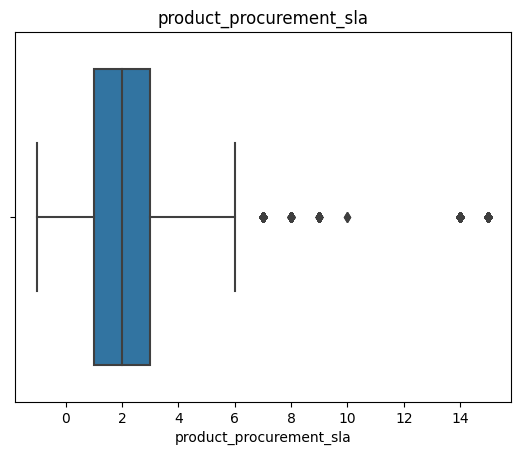

In [29]:
x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

In [30]:
num.remove('units')
num.remove('product_mrp')
for i in num:
  q1=EleData2[i].quantile(0.25)
  q3=EleData2[i].quantile(0.75)
  iqr=q3-q1
  lw=iqr-(q1*1.5)
  up=iqr+(q3*1.5)
  print(i,lw,up)
  EleData2.loc[EleData2[i]<lw,i]=0.5
  EleData2.loc[EleData2[i]>up,i]=up

sla -3.0 13.5
product_procurement_sla 0.5 6.5


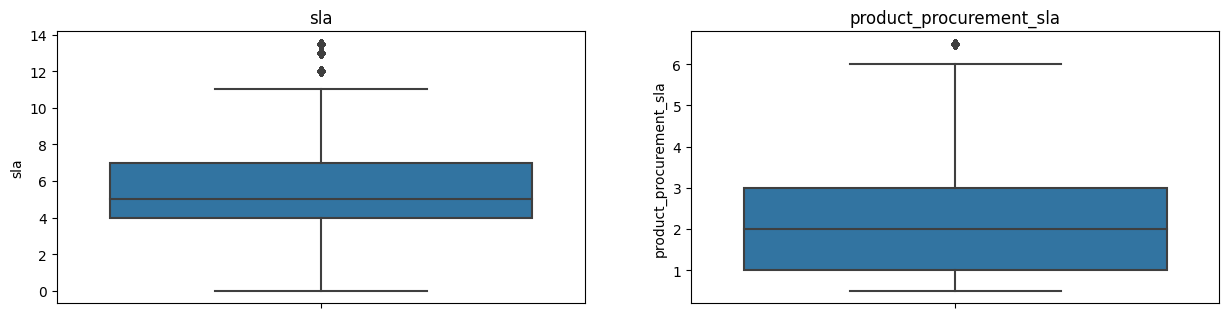

In [31]:
plt.figure(figsize=(15, 12))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.boxplot(y=EleData2[i])
  x=x+1


# Data Analysis and feature extraction

In [32]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [33]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [34]:
# 2. Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [35]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016
EleData2.discount_per.describe()


count    385996.000000
mean          0.403688
std           0.211310
min           0.000000
25%           0.230000
50%           0.400000
75%           0.550000
max           1.000000
Name: discount_per, dtype: float64

In [36]:
# ## sales Calendar
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["date"])

# SalesCal1=SalesCal1[0].to_list()
SalesCal1
EleData2['sale']=0
SalesCal1
# EleData2.order_date.head()
EleData2["date"]=EleData2.order_date.apply(lambda x : str(x).strip())
# EleData2.date
EleData2.loc[EleData2["date"].isin(SalesCal1['date']),"sale"]=1
# test =pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='date',how='left')
# test[~test["date"].isna()]
EleData2.loc[EleData2.sale==1]
EleData2.rename(columns={"sale":"sale_day_flag"},inplace=True)



In [37]:
# EleData2.info()
# EleData2.week=EleData2.week.astype(object)
EleData2.sale_day_flag.value_counts()

0    305187
1     80809
Name: sale_day_flag, dtype: int64

In [38]:
### Weather
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date

In [39]:

Ont_Weather=Ont_Weather.sort_values(by='Date/Time')
Ont_Weather.info()
Ont_Weather.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
Ont_Weather.ffill(inplace=True)
Ont_Weather.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


Date/Time      0
Year           0
Month          0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
week           0
dtype: int64

In [40]:
EleData2=pd.merge(EleData2,Ont_Weather,left_on=EleData2['order_date'],right_on=Ont_Weather['Date/Time'],how='left')


In [41]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


,Header,Month1,Value,Month,Year
0,NPS,July'15,54.599588,7,2015
1,Stock Index,July'15,1177.000000,7,2015
2,NPS,Aug'15,59.987101,8,2015
3,Stock Index,Aug'15,1206.000000,8,2015
4,NPS,Sept'15,46.925419,9,2015
5,Stock Index,Sept'15,1101.000000,9,2015
6,NPS,Oct'15,44.398389,10,2015
7,Stock Index,Oct'15,1210.000000,10,2015
8,NPS,Nov'15,47.000000,11,2015
9,Stock Index,Nov'15,1233.000000,11,2015


In [42]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [43]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [44]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived',
       'listing_price', 'discount_per', 'sale_day_flag', 'date', 'Date/Time',
       'Day', 'max_temp_c', 'mon_temp_c', 'mean_temp_c', 'heat_deg_c',
       'cool_deg_c', 'total_rain', 'total_snow', 'Stock_Index', 'NPS', 'Year',
       'week'],
      dtype='object')

In [45]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [46]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [47]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [48]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')

In [49]:
EleData2['month_start']=pd.to_datetime(EleData2[['Year', 'Month']].assign(DAY=1))

In [50]:
## Pay Date

EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15)|(pd.to_datetime(x).is_month_end) else 0)
# pd.to_datetime(EleData3['order_date']).dt.day
# pd.to_datetime(EleData3['order_date']).dt.is_month_end
# EleData3[EleData3.pay_date_flag==1]

In [51]:
## aDstock
# EleData3.columns
# considering 0.8 decay
# ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [52]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [53]:
Inv2['week']=nm.arange(1,54)
# Inv2.info()

In [54]:
EleData3=pd.merge(EleData2,Inv2,left_on='week',right_on='week')


In [55]:
# EleData3.columns
EleData3.rename({'Month_x':"Month","Year_x":"Year"},inplace=True,axis=1)
EleData3.drop(["Month_y","Year_y"],inplace=True,axis=1)

In [56]:
EleData3.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived',
       'listing_price', 'discount_per', 'sale_day_flag', 'date', 'Date/Time',
       'Day', 'max_temp_c', 'mon_temp_c', 'mean_temp_c', 'heat_deg_c',
       'cool_deg_c', 'total_rain', 'total_snow', 'Stock_Index', 'NPS', 'Year',
       'week', 'month_start', 'pay_date_flag', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'Total_Investment_AD', 'TV_AD',
       'Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD'],
      dtype='object')

# Data Aggregation and analysis

In [57]:
EleData3.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived',
       'listing_price', 'discount_per', 'sale_day_flag', 'date', 'Date/Time',
       'Day', 'max_temp_c', 'mon_temp_c', 'mean_temp_c', 'heat_deg_c',
       'cool_deg_c', 'total_rain', 'total_snow', 'Stock_Index', 'NPS', 'Year',
       'week', 'month_start', 'pay_date_flag', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'Total_Investment_AD', 'TV_AD',
       'Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD'],
      dtype='object')

In [58]:
## payment type handling
EleData3.product_analytic_sub_category.value_counts()
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)

In [59]:
sales_weekly=EleData3.groupby(['week','product_analytic_sub_category']).agg({'order_item_id':pd.Series.nunique, 'gmv':'sum','units':'sum','order_payment_type':'sum',
                                                                'sla':'mean','product_mrp':'mean','product_procurement_sla':'mean','listing_price':'mean',
                                                                'discount_per':'mean','max_temp_c':'mean','mon_temp_c':'mean',
                                                                'mean_temp_c':'mean','heat_deg_c':'mean','cool_deg_c':'mean','total_rain':'mean',
                                                                'total_snow':'mean','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                                                'Total Investment':'max', 'TV':'max', 'Digital':'max','Sponsorship':'max', 'Content Marketing':'max',
                                                                'Online marketing':'max', 'Affiliates':'max',
                                                                'SEM':'max', 'Radio':'max', 'Other':'max', 'Total_Investment_AD':'max', 'TV_AD':'max',
                                                                'Digital_AD':'max','Content_Marketing_AD':'max', 'Online_marketing_AD':'max', 'Affiliates_AD':'max',
                                                                'SEM_AD':'max', 'Radio_AD':'max', 'Other_AD':'max'}).round(2).reset_index()

## Week
SalesCal1['week']=((pd.to_datetime(SalesCal1['date'])-pd.to_datetime('2015-07-01'))/7)
SalesCal1['week']=SalesCal1['week'].apply(lambda x: x.days+1)
SalesCal1.loc[:,['date','week']]
SalesCal1.week.value_counts()
SalesCal1.groupby('week')["date"].count().reset_index()
sales_weekly=pd.merge(sales_weekly,(SalesCal1.groupby('week')["date"].count().reset_index()),on='week',how='left')
sales_weekly.rename(columns={"date":"num_of_sales"},inplace=True)

In [60]:
sales_weekly.head()
sales_weekly.num_of_sales.fillna(0,inplace=True)
sales_weekly.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)

In [353]:
sales_weekly["cod_per"]=sales_weekly["order_payment_cod"]/sales_weekly["order_count"]

Camera Analysis

In [354]:
##
camera=sales_weekly[sales_weekly.product_analytic_sub_category=='camera']
# camera.discount_per

In [355]:
## Inflation discount and listing price

camera[['I2_LP','I2_Discount']] = camera[['listing_price','discount_per']].rolling(window=2,min_periods=1).mean()
camera[['I3_LP','I3_Discount']] = camera[['listing_price','discount_per']].rolling(window=3,min_periods=1).mean()
camera[['I4_LP','I4_Discount']] = camera[['listing_price','discount_per']].rolling(window=4,min_periods=1).mean()

camera['I2_LP']=(camera['listing_price']-camera['I2_LP'])/camera['listing_price']
camera['I3_LP']=(camera['listing_price']-camera['I3_LP'])/camera['listing_price']
camera['I4_LP']=(camera['listing_price']-camera['I4_LP'])/camera['listing_price']


camera['I2_Discount']=(camera['discount_per']-camera['I2_Discount'])/camera['listing_price']
camera['I3_Discount']=(camera['discount_per']-camera['I3_Discount'])/camera['listing_price']
camera['I4_Discount']=(camera['discount_per']-camera['I4_Discount'])/camera['listing_price']

In [69]:
camera.drop("product_analytic_sub_category",1,inplace=True)

In [356]:
cam_corr=camera.corr()[(((camera.corr()>0.95) | (camera.corr()<-0.95)) & (camera.corr()!=1))]
# plt.figure(figsize=(15,10))
# sns.heatmap(cam_corr)
cam_corr[cam_corr.notna()==True]
## order cnt , gmv and units highly correlated
## product mrp and listing price highly related

# lets remove the and check

camera.drop(['order_count','units','product_mrp','min_temp_c','max_temp_c','heat_deg_c','Other_AD',"Other"],1,inplace=True)

## temp variables


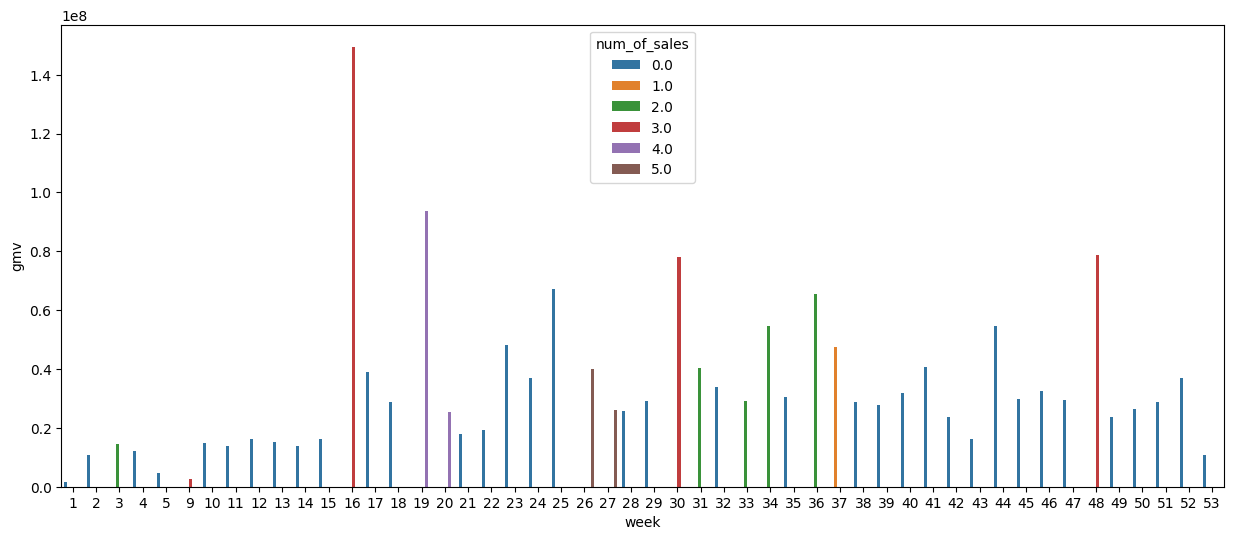

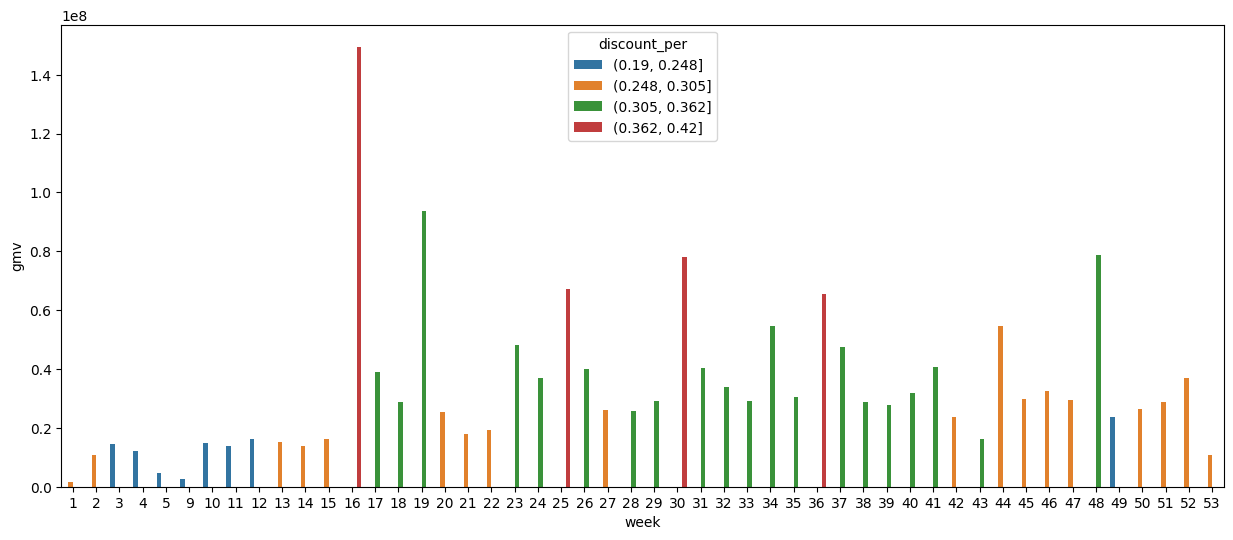

In [357]:
plt.figure(figsize=(15,6))
sns.barplot(x=camera['week'],y=camera['gmv'],hue=camera['num_of_sales'])
plt.show()
# On an avverage 3 sales a week giving better result

plt.figure(figsize=(15,6))
sns.barplot(x=camera['week'],y=camera['gmv'],hue=pd.cut(camera['discount_per'],bins=4))
plt.show()

In [358]:
# camera.corr()
camera.drop("cool_deg_c",1,inplace=True)
##

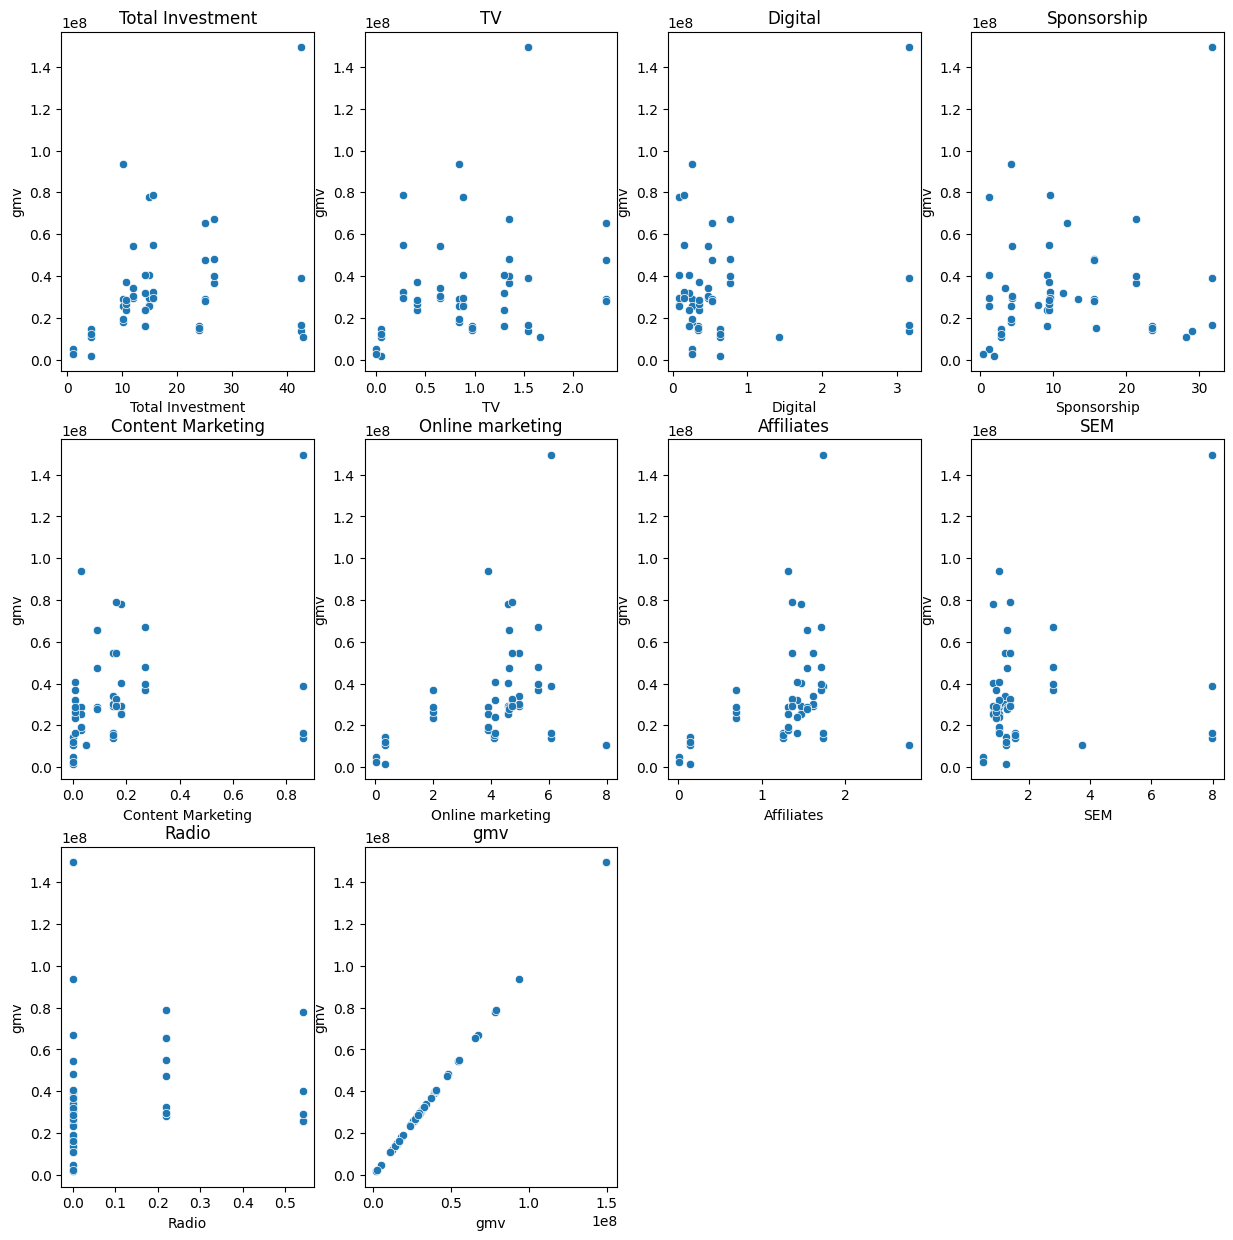

In [359]:
markinv = ['Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','Affiliates','SEM','Radio','gmv']

plt.figure(figsize=(15, 15))
x=1
for i in markinv:
  plt.subplot(3,4,x)
  plt.title(i)
  sns.scatterplot(y=camera['gmv'],x=camera[i])
  x=x+1

## Total 15
## TV 1
## Digital<1
## spons 10
# content
# online marketing 5
# afflicates 1 to 2
# sEM < 1
# radio and other doesnt matter much


In [360]:
camera.drop('product_analytic_sub_category',1,inplace=True)
camera.corr()

,week,gmv,order_payment_cod,sla,product_procurement_sla,listing_price,discount_per,mean_temp_c,total_rain,total_snow,...,SEM_AD,Radio_AD,num_of_sales,cod_per,I2_LP,I2_Discount,I3_LP,I3_Discount,I4_LP,I4_Discount
week,1.000000,0.198315,0.056649,-0.340069,-0.269032,0.830678,0.287167,-0.188271,-0.104064,0.111508,...,-0.235967,0.263500,-0.106381,-0.292299,-0.118845,-0.045514,-0.146622,-0.057658,-0.173539,-0.085736
gmv,0.198315,1.000000,0.914022,-0.032804,0.243299,0.409342,0.713451,-0.329953,-0.023945,-0.009986,...,0.294874,0.163156,0.434219,-0.267436,0.404106,0.513120,0.389993,0.581596,0.367925,0.597632
order_payment_cod,0.056649,0.914022,1.000000,0.100864,0.233372,0.247157,0.642306,-0.326814,-0.022264,-0.029468,...,0.433627,0.213805,0.413036,0.099463,0.319516,0.442860,0.310418,0.518153,0.285228,0.564897
sla,-0.340069,-0.032804,0.100864,1.000000,0.403222,-0.325867,0.205774,-0.478110,0.028116,0.434534,...,0.010661,0.220155,0.082144,0.261701,-0.172363,-0.124005,-0.223360,-0.095647,-0.237304,-0.035523
product_procurement_sla,-0.269032,0.243299,0.233372,0.403222,1.000000,-0.109781,0.447905,-0.467460,0.131762,0.077362,...,0.033671,0.252407,0.258307,-0.095216,0.217537,0.311699,0.131197,0.334693,0.103300,0.371636
listing_price,0.830678,0.409342,0.247157,-0.325867,-0.109781,1.000000,0.489668,-0.292187,-0.090810,0.056527,...,-0.253562,0.236269,0.171911,-0.348945,0.141642,0.052328,0.186930,0.076778,0.210309,0.070257
discount_per,0.287167,0.713451,0.642306,0.205774,0.447905,0.489668,1.000000,-0.723800,0.136856,0.173651,...,0.131126,0.390900,0.313299,-0.279711,0.238820,0.380009,0.216433,0.466156,0.186220,0.519922
mean_temp_c,-0.188271,-0.329953,-0.326814,-0.478110,-0.467460,-0.292187,-0.723800,1.000000,-0.099607,-0.510676,...,0.041648,-0.452490,-0.179213,0.164514,0.063425,-0.048872,0.135070,-0.037873,0.174314,-0.028409
total_rain,-0.104064,-0.023945,-0.022264,0.028116,0.131762,-0.090810,0.136856,-0.099607,1.000000,-0.086083,...,-0.167242,0.124133,0.113395,0.084941,-0.148786,-0.071715,-0.072308,-0.037581,-0.097687,-0.093560
total_snow,0.111508,-0.009986,-0.029468,0.434534,0.077362,0.056527,0.173651,-0.510676,-0.086083,1.000000,...,-0.158661,0.045075,-0.032857,-0.050958,-0.144301,-0.035312,-0.208711,-0.184666,-0.221182,-0.247302


<Axes: xlabel='cod_per', ylabel='gmv'>

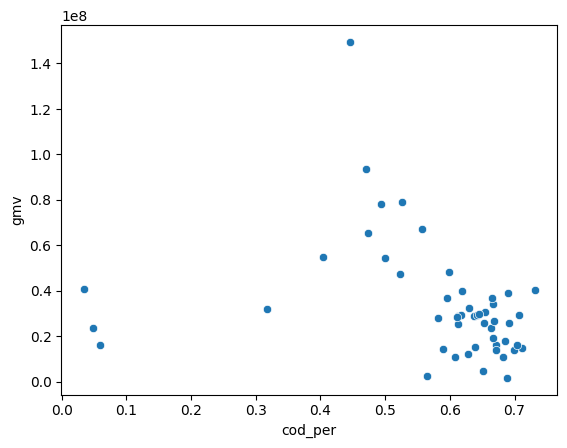

In [363]:
sns.scatterplot(y=camera['gmv'],x=camera['cod_per'])

##most of the orders are cod


In [376]:
camera.iloc[:,15:30].corr()
camera.iloc[:,30:].corr()

## SEM and Digital
## Online and Affiliates
#checking how many co-related to each other to remove


,num_of_sales,cod_per,I2_LP,I2_Discount,I3_LP,I3_Discount,I4_LP,I4_Discount
num_of_sales,1.000000,-0.029335,0.215101,0.034397,0.255445,0.099587,0.259963,0.095066
cod_per,-0.029335,1.000000,-0.236678,-0.169937,-0.228992,-0.169566,-0.209411,-0.132166
I2_LP,0.215101,-0.236678,1.000000,0.455309,0.871175,0.462306,0.776970,0.433449
I2_Discount,0.034397,-0.169937,0.455309,1.000000,0.269632,0.874936,0.183384,0.785762
I3_LP,0.255445,-0.228992,0.871175,0.269632,1.000000,0.392014,0.943056,0.405372
I3_Discount,0.099587,-0.169566,0.462306,0.874936,0.392014,1.000000,0.280742,0.945892
I4_LP,0.259963,-0.209411,0.776970,0.183384,0.943056,0.280742,1.000000,0.336344
I4_Discount,0.095066,-0.132166,0.433449,0.785762,0.405372,0.945892,0.336344,1.000000


Camera Modeling


In [290]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

KeyError: ignored

In [143]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera, train_size = 0.7, test_size = 0.3, random_state = 100)

In [291]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=['week','gmv','sla', 'product_procurement_sla', 'listing_price', 'discount_per','order_payment_cod',
       'mean_temp_c', 'total_rain', 'total_snow', 'Stock_Index', 'NPS','Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Total_Investment_AD', 'TV_AD', 'Digital_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'Affiliates_AD', 'SEM_AD', 'Radio_AD',
       'num_of_sales', 'I2_LP', 'I2_Discount', 'I3_LP', 'I3_Discount', 'I4_LP',
       'I4_Discount']
df_train[scale_var]=scaler.fit_transform(df_train[scale_var])
# df_train

In [145]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [147]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [272]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)

In [292]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =list(df.sort_values(by=2).head(15)[0])
df
# features


,0,1,2
0,week,False,20
1,order_payment_cod,False,18
2,sla,False,13
3,product_procurement_sla,True,1
4,listing_price,True,1
5,discount_per,False,21
6,mean_temp_c,True,1
7,total_rain,False,12
8,total_snow,False,22
9,Stock_Index,True,1


In [274]:
list(features)

['I4_Discount',
 'Digital_AD',
 'TV_AD',
 'I4_LP',
 'Sponsorship',
 'Digital',
 'num_of_sales',
 'Stock_Index',
 'TV',
 'product_procurement_sla',
 'I3_Discount',
 'I2_Discount',
 'listing_price',
 'SEM_AD',
 'mean_temp_c']

In [293]:
x_train_m =build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     5.643
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           0.000306
Time:                        12:29:39   Log-Likelihood:                 36.909
No. Observations:                  35   AIC:                            -41.82
Df Residuals:                      19   BIC:                            -16.93
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [294]:
features.remove('Digital')
X_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     6.356
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           0.000117
Time:                        12:29:53   Log-Likelihood:                 36.890
No. Observations:                  35   AIC:                            -43.78
Df Residuals:                      20   BIC:                            -20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [295]:
features.remove('Sponsorship')
x_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     7.133
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           4.40e-05
Time:                        12:30:02   Log-Likelihood:                 36.781
No. Observations:                  35   AIC:                            -45.56
Df Residuals:                      21   BIC:                            -23.79
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [296]:
features.remove('I4_Discount')
X_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     7.846
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.90e-05
Time:                        12:30:10   Log-Likelihood:                 36.337
No. Observations:                  35   AIC:                            -46.67
Df Residuals:                      22   BIC:                            -26.45
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [297]:
features.remove('Digital_AD')
X_train_m==build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     8.928
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           6.18e-06
Time:                        12:30:15   Log-Likelihood:                 36.304
No. Observations:                  35   AIC:                            -48.61
Df Residuals:                      23   BIC:                            -29.94
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

True

In [298]:
# checkVIF(X_train[features])
features.remove('mean_temp_c')
X_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     10.25
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.84e-06
Time:                        12:30:20   Log-Likelihood:                 36.303
No. Observations:                  35   AIC:                            -50.61
Df Residuals:                      24   BIC:                            -33.50
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [299]:
features.remove('I4_LP')
# checkVIF(X_train[features])
X_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     11.27
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           8.23e-07
Time:                        12:30:25   Log-Likelihood:                 35.586
No. Observations:                  35   AIC:                            -51.17
Df Residuals:                      25   BIC:                            -35.62
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [300]:
features.remove('I3_Discount')
X_train_m=build_model(X_train[features],y_train)


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     12.34
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           4.13e-07
Time:                        12:30:31   Log-Likelihood:                 34.656
No. Observations:                  35   AIC:                            -51.31
Df Residuals:                      26   BIC:                            -37.31
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

True

In [305]:
features.remove('TV_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

ValueError: ignored

In [306]:
features.remove('TV')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     16.39
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           5.21e-08
Time:                        12:31:00   Log-Likelihood:                 33.588
No. Observations:                  35   AIC:                            -53.18
Df Residuals:                      28   BIC:                            -42.29
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,listing_price,5.41
3,I2_Discount,5.18
2,product_procurement_sla,4.51
1,Stock_Index,3.04
5,SEM_AD,1.66
0,num_of_sales,1.62


In [307]:
features.remove("product_procurement_sla")
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     17.05
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.26e-08
Time:                        12:31:06   Log-Likelihood:                 31.214
No. Observations:                  35   AIC:                            -50.43
Df Residuals:                      29   BIC:                            -41.10
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2063      0.064     -3.244

,Features,VIF
3,listing_price,4.92
2,I2_Discount,3.77
1,Stock_Index,2.93
4,SEM_AD,1.60
0,num_of_sales,1.52


In [311]:
lr4 = sm.OLS(y_train, X_train[features]).fit()
y_train_pred=lr4.predict(X_train[features])

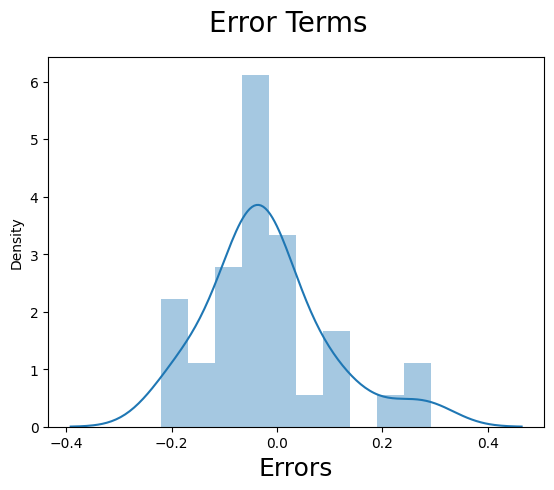

In [313]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

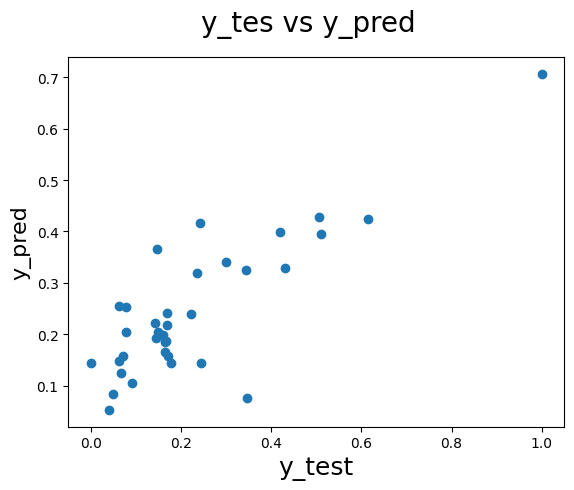

In [314]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_tes vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [345]:
## on test
df_test[scale_var]=scaler.fit_transform(df_test[scale_var])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [344]:
X_test

,const,week,order_payment_cod,sla,product_procurement_sla,listing_price,discount_per,mean_temp_c,total_rain,total_snow,...,Affiliates_AD,SEM_AD,Radio_AD,num_of_sales,I2_LP,I2_Discount,I3_LP,I3_Discount,I4_LP,I4_Discount
21,1.0,0.173077,0.488818,0.467811,0.539216,0.436870,0.142857,0.972125,1.000000,0.000000,...,0.404531,0.093583,0.000000,0.000000,0.246139,1.000000,0.487369,0.996185,0.568882,1.000000
111,1.0,0.750000,0.390575,0.296137,0.754902,0.756133,0.714286,0.103223,0.354067,0.135266,...,0.705502,0.084670,0.333333,0.000000,0.541275,0.762723,0.427594,0.737882,0.467190,0.481173
114,1.0,0.769231,0.010383,0.403433,0.794118,0.808194,0.857143,0.036150,0.293062,0.787440,...,0.686084,0.073975,0.000000,0.000000,0.597221,0.944001,0.620866,1.000000,0.631609,0.849335
87,1.0,0.596154,1.000000,1.000000,0.421569,0.683417,0.785714,0.000000,0.005981,1.000000,...,0.754045,0.079323,0.818182,0.000000,0.436680,0.368936,0.272310,0.000000,0.413760,0.000000
132,1.0,0.884615,0.716454,0.184549,0.470588,0.835591,0.500000,0.481707,0.000000,0.000000,...,0.653722,0.117647,1.000000,0.000000,0.541823,0.851811,0.580979,0.945259,0.668991,0.810661
150,1.0,1.000000,0.210863,0.000000,0.225490,1.000000,0.428571,1.000000,0.084928,0.000000,...,1.000000,0.307487,0.000000,0.000000,0.526258,0.681933,0.644721,0.838140,0.750895,0.732878
18,1.0,0.153846,0.021565,0.416309,1.000000,0.557839,0.000000,0.987369,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.654932,1.000000,0.853651,1.000000,0.711397
102,1.0,0.692308,0.986422,0.484979,0.509804,0.834409,1.000000,0.464286,0.800239,0.000000,...,0.747573,0.106952,1.000000,0.333333,0.500663,0.406108,0.515795,0.689303,0.555644,0.597144
63,1.0,0.442308,0.981629,0.446352,0.852941,0.666720,0.857143,0.182056,0.007177,0.000000,...,0.822006,0.306595,0.000000,0.000000,0.408812,0.463939,0.532499,0.848943,0.668040,0.946763
129,1.0,0.865385,0.815495,0.240343,0.401961,0.816400,0.428571,0.460366,0.311005,0.000000,...,0.653722,0.117647,1.000000,0.000000,0.594349,0.852892,0.608320,0.843528,0.537299,0.488306


In [346]:
y_test_pred=lr4.predict(X_test)

Text(0, 0.5, 'y_test_pred')

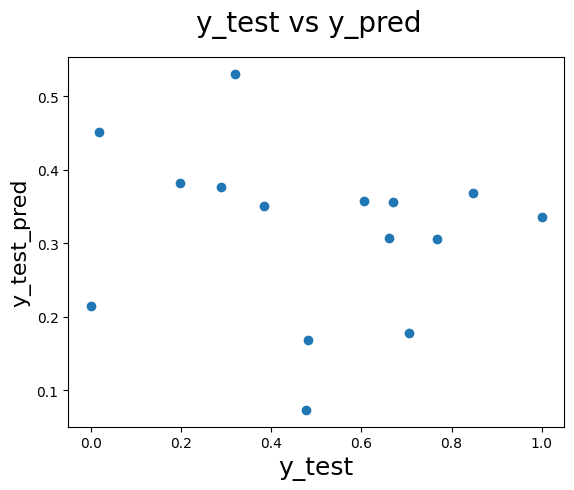

In [349]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)